 # DATA AUGMENTATION

In [1]:
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from skimage.util import random_noise

In [2]:
%matplotlib inline

In [3]:
img= cv2.imread(r"images/train/shruthi_20.jpeg")
img= cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #we are converting image to BGR because matplotlib displays image BGR format
#if you are using cv2 for displaying image, no need to convert image to BGR

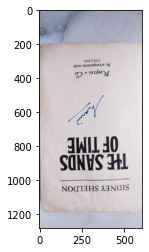

In [4]:
plt.imshow(img)
plt.show()

In [5]:
height, width, dims= img.shape
print(height, width, dims) #print dimensions of original image

1280 605 3


In [6]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # use cv2.COLOR_RGB2GRAY if you are using cv2 for displaying image,
#it doesn't matter while converting image to grayscale

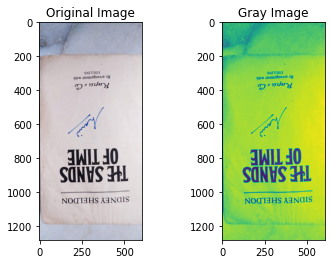

In [7]:
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(gray)
plt.title("Gray Image")
plt.show()

In [8]:
img= cv2.resize(img,(700,700))
img.shape    # Original image has 3 channels - RGB

(700, 700, 3)

In [9]:
gray.shape

(1280, 605)

In [10]:
noisy_image= random_noise(img, mode='Gaussian', clip=True)  # Add noise modes could be Gaussian, Poisson, etc
                                                        # clip=True ensures the range of pixels is within range

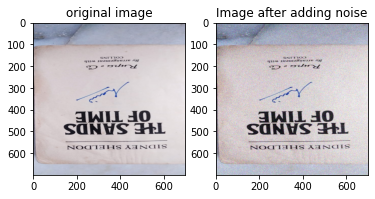

In [11]:
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Image after adding noise')
plt.imshow(noisy_image)

In [12]:
blur_image= cv2.GaussianBlur(img, (11,11),0)

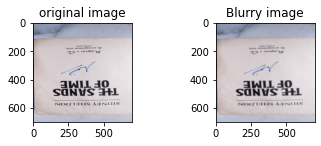

In [13]:
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(2,2,2)
plt.title('Blurry image')
plt.imshow(blur_image)

In [14]:
def rotate_image(mat, angle):
    """
    Rotates an image (angle in degrees) and expands image to avoid cropping
    """

    height, width = mat.shape[:2] # image shape has 3 dimensions
    image_center = (width/2, height/2) # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape

    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

    # rotation calculates the cos and sin, taking absolutes of those.
    abs_cos = abs(rotation_mat[0,0]) 
    abs_sin = abs(rotation_mat[0,1])

    # find the new width and height bounds
    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)

    # subtract old image center (bringing image back to origo) and adding the new image center coordinates
    rotation_mat[0, 2] += bound_w/2 - image_center[0]
    rotation_mat[1, 2] += bound_h/2 - image_center[1]

    # rotate image with the new bounds and translated rotation matrix
    rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h), borderValue=(255,255,255))
    return rotated_mat

In [15]:
rot_img = rotate_image(img,45)

Text(0.5, 1.0, '45 degree rotated image')

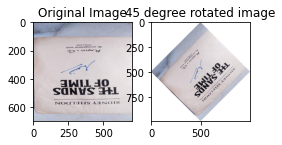

In [16]:
plt.subplot(131)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(rot_img)
plt.title("45 degree rotated image")

In [17]:
#Lets define functions for each operation
def anticlockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate_image(image, angle)

def clockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate_image(image, -angle)

def add_noise(image):
    return random_noise(image, mode='Gaussian', clip=True)

def blur_image(image):
    return cv2.GaussianBlur(image, (9,9),0)

In [68]:
transformations = { 'rotate anticlockwise': anticlockwise_rotation,
                    'rotate clockwise': clockwise_rotation,
                    'adding noise': add_noise,
                    'blurring image':blur_image
                 }                #use dictionary to store names of functions 

In [69]:
original_path="images/train/" #path to original images
augmented_path="images/aug" # path to store aumented images
images=[] # to store paths of images from folder

In [70]:
for im in os.listdir(original_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(original_path,im))
print(images)

['images/train/101.png', 'images/train/102.png', 'images/train/104.png', 'images/train/105.png', 'images/train/107.png', 'images/train/108.png', 'images/train/11.png', 'images/train/110.png', 'images/train/111.png', 'images/train/113.png', 'images/train/114.png', 'images/train/116.png', 'images/train/117.png', 'images/train/119.png', 'images/train/12.png', 'images/train/120.png', 'images/train/122.png', 'images/train/123.png', 'images/train/125.png', 'images/train/126.png', 'images/train/128.png', 'images/train/129.png', 'images/train/131.png', 'images/train/132.png', 'images/train/134.png', 'images/train/135.png', 'images/train/137.png', 'images/train/138.png', 'images/train/14.png', 'images/train/140.png', 'images/train/141.png', 'images/train/143.png', 'images/train/144.png', 'images/train/146.png', 'images/train/147.png', 'images/train/149.png', 'images/train/15.png', 'images/train/150.png', 'images/train/152.png', 'images/train/153.png', 'images/train/155.png', 'images/train/156.p

In [71]:
images_to_generate=1000  #you can change this value according to your requirement
i=901                      # variable to iterate till images_to_generate

In [72]:
while i<=images_to_generate:    
    image=random.choice(images)
    while image.endswith('.db'):
        image=random.choice(images)
    print(image)
#     image = 'images/train/shruthi_20.jpeg'
    original_image = io.imread(image)
    transformed_image=None
    filename = image.split('/')
    print(filename[2])
    n = 0       #variable to iterate till number of transformation to apply
    transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    print(transformation_count)
    
    transformation_list = []
    while n <= transformation_count:
        key = random.choice(list(transformations)) #randomly choosing method to call
        for j in range(len(transformation_list)):
            if(transformation_list[i]=='blurring image' and key == 'blurring image'):
                ;
            else:
                transformation_list.append(key)
                print(key)
        transformed_image = transformations[key](original_image)
        n = n + 1
        
    new_image_path= "%s/aug_%s-%s" %(augmented_path, i, filename[2])
    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
    cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
    i =i+1
#to generate more images, put above 3 statement inside while n<... loop

images/train/83.png
83.png
2
images/train/137.png
137.png
1
images/train/173.png
173.png
1
images/train/18.png
18.png
4
images/train/shakkthi_14.jpg
shakkthi_14.jpg
1
images/train/aparna_19.jpeg
aparna_19.jpeg
2
images/train/aparna_20.jpeg
aparna_20.jpeg
4
images/train/108.png
108.png
4
images/train/198.png
198.png
1
images/train/63.png
63.png
2
images/train/164.png
164.png
2
images/train/shruthi_18.jpeg
shruthi_18.jpeg
4
images/train/105.png
105.png
1
images/train/194.png
194.png
3
images/train/216.png
216.png
3
images/train/159.png
159.png
4
images/train/shruthi_15.jpeg
shruthi_15.jpeg
1
images/train/213.png
213.png
1
images/train/shakkthi_22.jpg
shakkthi_22.jpg
4
images/train/173.png
173.png
2
images/train/192.png
192.png
4
images/train/60.png
60.png
1
images/train/5.png
5.png
2
images/train/212.png
212.png
3
images/train/56.png
56.png
3
images/train/96.png
96.png
2
images/train/194.png
194.png
4
images/train/shruthi_1.jpg
shruthi_1.jpg
3
images/train/126.png
126.png
1
images/train/

In [ ]:
image = cv2.imread('images/aug_images/aug_shakkthi_20.jpg')
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(image, -1, sharpen_kernel)

cv2.imshow('sharpen', sharpen)
cv2.waitKey()

## Converting to Grayscale

In [ ]:
import cv2

In [ ]:
# Display the image using opencv
img = cv2.imread('images/train/shruthi_20.jpeg')
cv2.imshow("Image displayed", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Convert color image to grayscale image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Converted gray image", gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# BINARIZATION 
(thresh, blackandwhiteImage) = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
cv2.imshow("Black and white image", blackandwhiteImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Rotate image properly

In [ ]:
## (1) Convert to gray, and threshold
gray = cv2.cvtColor(rot_img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

## (2) Morph-op to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)

## (3) Find the max-area contour
cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
cnt = sorted(cnts, key=cv2.contourArea)[-1]

## (4) Crop and save it
x,y,w,h = cv2.boundingRect(cnt)
dst = img[y:y+h, x:x+w]
cv2.imwrite('1.jpg', dst)

In [ ]:
img = cv2.imread('images/aug_images/aug_3.png') 
  
# Apply bilateral filter with d = 15,  
# sigmaColor = sigmaSpace = 75. 
bilateral = cv2.bilateralFilter(img, 15, 75, 75) 
  
# Save the output. 
cv2.imwrite('corrected_image.jpg', bilateral) 

In [ ]:
from math import log10, sqrt 
import cv2 
import numpy as np 
  
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
def main(): 
    original = cv2.imread("images/aug_images/aug_3.png") 
    compressed = cv2.imread("images/train_cleaned/3.png") 
    value = PSNR(original, compressed) 
    print(f"PSNR value is {value} dB") 
       
if __name__ == "__main__": 
    main() 

In [ ]:
A = cv2.imread("images/aug_images/aug_3.png") 
B = cv2.imread("images/train_cleaned/3.png")
# err = immse(A, ref);
err = (np.square(A - B)).mean()
print('\n The mean-squared error is %0.4f\n', err);